<a href="https://colab.research.google.com/github/Peter-Apps/coding-camp/blob/main/Fixing_Errors_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Debugging Code & Fixing Errors

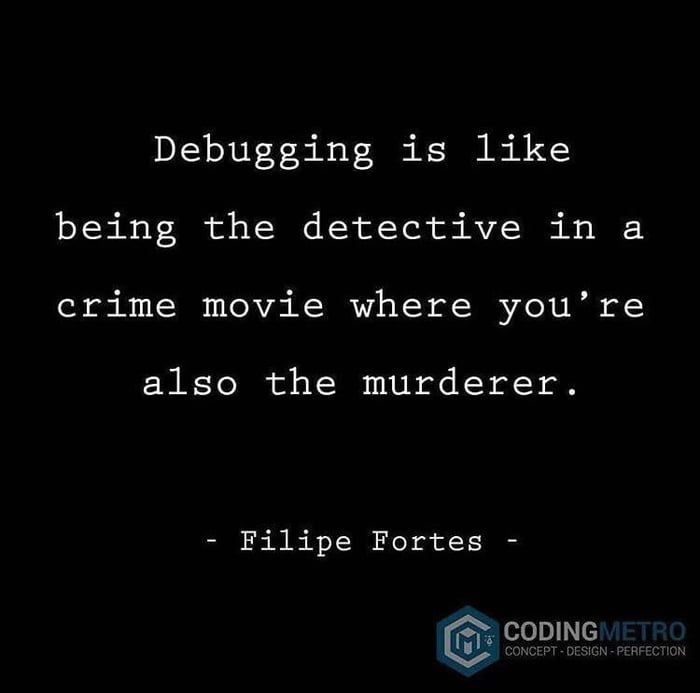

##Mistakes happen all the time in code. Here's a few of the more common error messages you may see.



For all of these, you'll get a red message describing the error as well as the line of code the error occurs on. You can search Google for more information on the error or click the "Explain Error" button right below the error message.

*Note*: The Explain Error is currently free, but may be locked behind a Pro subscription soon.

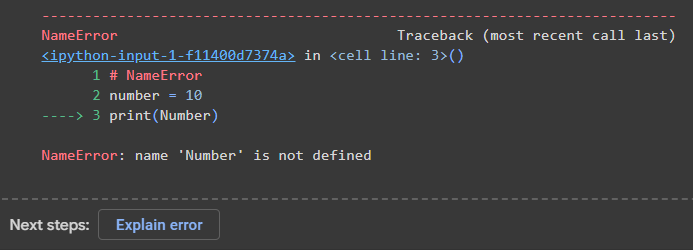

### Name Error

A NameError occurs when a variable or module is misspelled. Check your capitalization and make sure you're spelling is correct. This type of error may also occur

In [ ]:
# NameError
number = 10
print(Number)

###Type Error

A TypeError occurs when a function expects a certain type of data (int, float, string, etc) and gets a type that it doesn't expect. In the example below, we can't add a float (5.0) to a string ("10"). To fix this, we need to change the value of ```number3``` to either an integer (```10```) or a float (```10.0```).

In [ ]:
# TypeError
number2 = 5.0
number3 = "10"
print(number2 + number3)

### Attribute Error

An AttributeError occurs when a variable or module doesn't have a function or property with the provided name. You may have spelled the property wrong, or used the wrong command to access it.

In [ ]:
import math
print(math.sqt(4)) # The square root of 4 is 2

In [ ]:
import pandas as pd
pd.readcsv("fileName")

### Syntax Error

A SyntaxError usually means that there's something wrong with the way your code is written, not necessarially with what it's doing.

These errors are often caused by forgetting to close a parentheses or bracket ```() {} []``` or using a single quote ```'``` instead of a double quote ```"```.

In [ ]:
# Syntax Error
number4 = 123
print(f'{number4})

###Value Error

A ValueError occurs when a function receives an argument of the correct type but an inappropriate value. For example, trying to take the square root of a negative number or converting a letter into an integer will throw a ValueError.

In [ ]:
import math
print(math.sqrt(-4))

In [ ]:
letter = "A"
print(int(letter))

# Time to practice!

The code below is *supposed* to read in a csv data set into pandas and create a plot.

The output should look like this:

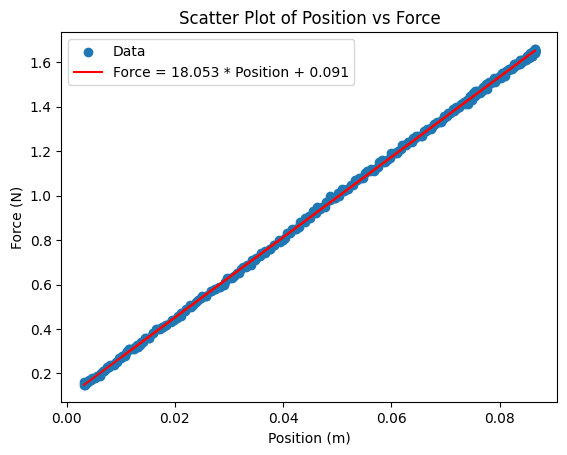

There's at least 15 errors in the code below, can you find and fix them all?

In [ ]:
# Import modules and read in the csv file
import matplotlib.pyplot as plt # <-As needs to be lowercase
import numpy as np
import pandas as pd
from scipy.stats import linregress #<- From needs to be lowercase

# read_csv not readcsv
data = pd.read_csv("https://sos.clayton.edu/physics/ALG/PHYS2211L/Lab%2010%20-%20Energy%20conservation%20-%20Spring%20constant%20data%20-%20ALL%20data.csv")
data


In [ ]:
# Select two columns for the scatter plot
# We use .dropna() to remove any empty rows in the column
x = data['Position-(m)-Run-1'].dropna() # Column Name is misspelled
y = data['Force-(N)-Run-1'].dropna()

# Calculate the slope of the graph using linear regression
slope, y_int, r_value, p_value, std_err = linregress(x,y) # lowercase L in linregress

# Create a scatter plot
plt.scatter(x, y, label='Data') # Lowercase x not uppercase, () not []
plt.xlabel('Position (m)') # Quotes need to match, xlabel not x-label
plt.ylabel('Force (N)') #plt not plot, ylabel not y_label
plt.title('Scatter Plot of Position vs Force') # Quotes need to match

# Create a line showing the trend
trend_x = x # underscore not dash
trend_y = x * slope + y_int # y_int not y_Int

# Add a label for the trendline
trend_label = f'Force = {slope:.3f} * Position + {y_int:.3f}' # Quotes need to match & lowercase trendlabel and round to :.3f
plt.plot(trend_x, trend_y, color = 'red', label = trend_label) # Color isn't Ted, plt.plot not plt.line
plt.legend() # Lowercase L in legend
plt.show() # () not {}

Now that we've fixed the issues above, let's try the 2nd part of this program. We're going to calculate the energy stored in the spring (using Run 1 data) and create a graph of PE vs x.

In [ ]:
# Creating a new dataframe using just the first 2 columns of the data
data2 = data[['Position-(m)-Run-1','Force-(N)-Run-1']].copy()

# Removing any invalid rows from the dataframe
data2 = data2.dropna()


The slope of our previous graph is the spring constant (k). To calculate the energy stored in the spring we'll use the equation $U_{sp} = \frac{1}{2}kx^2$.

The code below *should* add a calculated column to the `new_data` dataframe and create a plot of $U_{sp}$ vs $x$.

The finished graph should look like this:

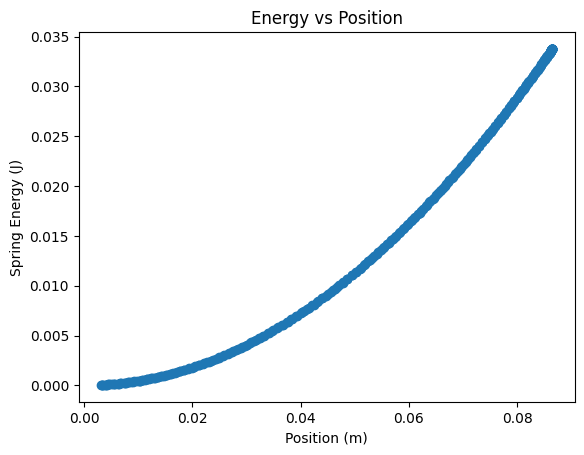

In [ ]:
# grabbing the slope from the previous example. If you get
# an undefined error, make sure you've run the blocks above
# without any errors
spring_constant = slope

# Misspelled sprint_constant
# Used ^ 2 for square instead of ** 2
data2["Spring Energy (J)"] = 0.5 * spring_constant * data2['Position-(m)-Run-1'] ** 2

# Switched x and y axis, won't throw an error but still wrong
x = data2['Position-(m)-Run-1']
y = data2["Spring Energy (J)"]

plt.scatter(x,y) # lowercase s in scatter
plt.xlabel("Position (m)")
plt.ylabel("Spring Energy (J)")
plt.title("Energy vs Position") # Used legend instead of title
plt.show() # capital s in show

Now that we've gotten a graph done nicely, let's linearlize it. To do this we'll need to plot $U_{sp}$ vs $x^2$. The code below has a bunch of errors throughout.

*Hint*: If you're not seeing any values for the trendline, this could be because of nan (not a number) values in your data table.

<font color = 'red'> <strong> Warning </strong> </font> there is one particular error below that may require you to restart the runtime. If you're sure you've fixed the error, but still get messages about it try going Runtime --> Restart Session & Run All. Be sure you've saved your work before you do this.



The finished graph should look like this:

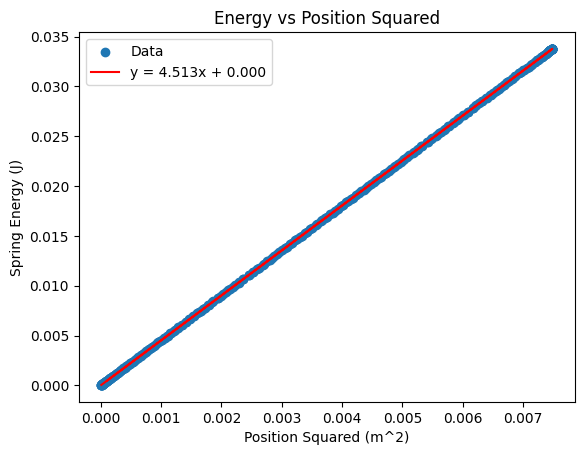

In [ ]:
# Making a copy of our dataframe in case anything gets messed up
data3 = data2.copy().dropna() # <-- Did not have the .dropna()

data3["Position Squared (m^2)"] = data3['Position-(m)-Run-1'] ** 2 # data3 not data2

# Make a plot of the results
x = data3["Position Squared (m^2)"] # Wrong column name
y = data3["Spring Energy (J)"] # Wrong column name
plt.scatter(x,y,label = "Data") # switched the x & y

#Set xlabel = instead of xlabel() This needs a runtime restart if they didn't catch it
plt.xlabel("Position Squared (m^2)")
plt.ylabel("Spring Energy (J)") # mismatched quotes & capital L in ylabel
plt.title("Energy vs Position Squared") # Title not title

# Add a trendline
slope, y_int, r_value, p_value, std_err = linregress(x,y) # missing values, they should check the examples above
trend_x = x
trend_y = trend_x * slope + y_int
trend_label = f'y = {slope:.3f}x + {y_int:.3f}' # Wrong rounding here, also the Y in the string is not capitalized
plt.plot(trend_x, trend_y, color = "r", label = trend_label) # quotes on the label

plt.legend(loc='upper left') #Wrong location for the legend
plt.show()
